### We want to build a classifier that can predict profit by day, month, year

In [1]:
# Import our dependencies
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  Import and read the file:
df = pd.read_csv("resources/superstore_cleaned_with_OrderID.csv", index_col=[0])
df.head()

,Order ID,Order_Date,Ship_Date,Ship_Mode,Segment,City,State,Country,Region,Market,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order Priority
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [3]:
# Keep only relevant columns for this analysis
df.drop(df.columns.difference(['Order_Date', 'Sales']), 1, inplace=True)
df.head()

/Users/forrestcasey/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Order_Date,Sales
0,2014-11-11,221.98
1,2014-02-05,3709.40
2,2014-10-17,5175.17
3,2014-01-28,2892.51
4,2014-11-05,2832.96


In [4]:
# Check the number of unique values in each column
df.nunique()

Order_Date     1430
Sales         20049
dtype: int64

In [5]:
df.dtypes

Order_Date     object
Sales         float64
dtype: object

In [6]:
df['Order_Date']= pd.to_datetime(df['Order_Date'])

In [7]:
df.dtypes

Order_Date    datetime64[ns]
Sales                float64
dtype: object

In [8]:
df.rename(columns={'Order_Date': 'ds', 'Sales': 'y'}, inplace=True)

In [9]:
df.head()

,ds,y
0,2014-11-11,221.98
1,2014-02-05,3709.40
2,2014-10-17,5175.17
3,2014-01-28,2892.51
4,2014-11-05,2832.96


In [10]:
# start prophet
m = Prophet(daily_seasonality=True)
m.fit(df)

Initial log joint probability = -15.561
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        171224    8.6428e-06       1366.22     0.04975           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136        171224    0.00011495       217.069           1           1      170   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [11]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1790,2016-12-26
1791,2016-12-27
1792,2016-12-28
1793,2016-12-29
1794,2016-12-30


In [12]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1790,2016-12-26,236.663672,-374.333044,856.596395
1791,2016-12-27,255.868999,-348.717404,917.301050
1792,2016-12-28,255.474435,-384.476682,851.219311
1793,2016-12-29,252.398525,-345.864426,881.686079
1794,2016-12-30,264.171967,-361.212784,923.132279


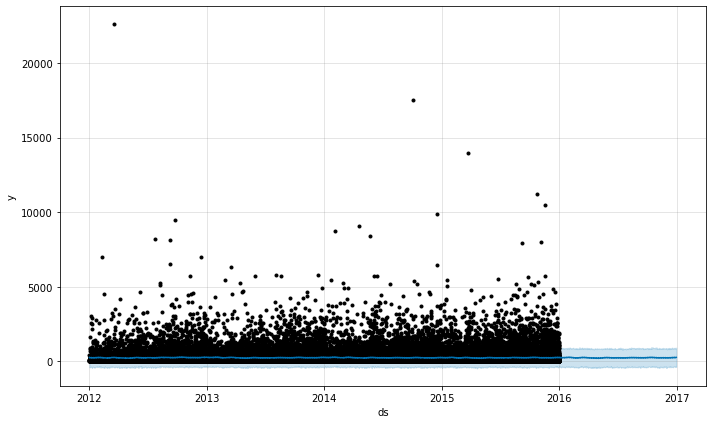

In [13]:
# Python
fig1 = m.plot(forecast)


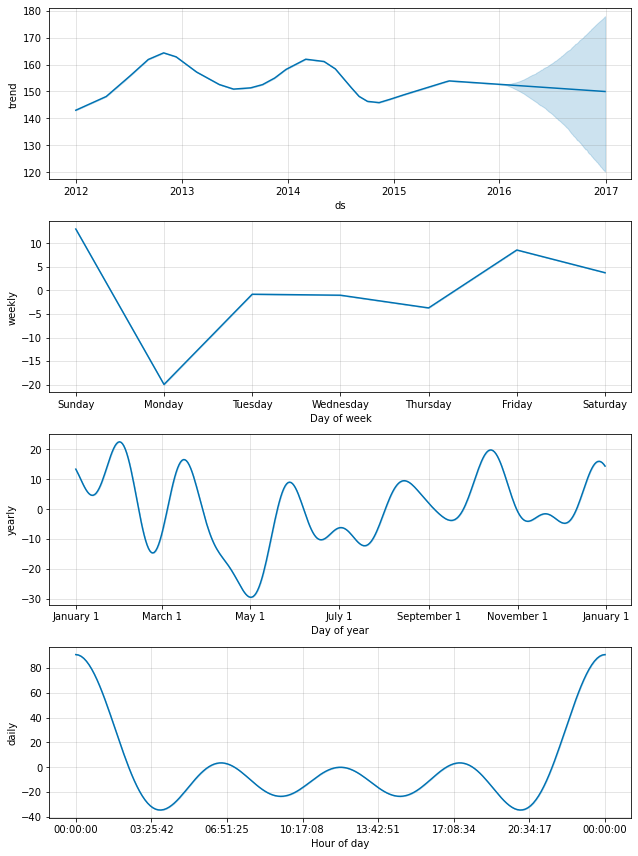

In [14]:
fig2 = m.plot_components(forecast)


In [1]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

NameError: name 'm' is not defined